## import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## explor data

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [5]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## data preprocessing

In [9]:
y= (y>0).astype(int)

In [10]:
y

,num
0,0
1,1
2,1
3,0
4,0
...,...
298,1
299,1
300,1
301,1


In [11]:
df = pd.concat([X, y], axis=1)

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [13]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [14]:
df = df.dropna()

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


In [16]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

pipe.fit(X_train, y_train)

rf_model = pipe.named_steps['model']
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:\n", feat_importances[:5])



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Feature Importance:
 thalach    0.134647
thal       0.127017
cp         0.122671
ca         0.103813
age        0.093068
dtype: float64


In [18]:
best_features = list(feat_importances[:5].index)

In [19]:
best_features

['thalach', 'thal', 'cp', 'ca', 'age']

## EDA

<Axes: xlabel='num', ylabel='count'>

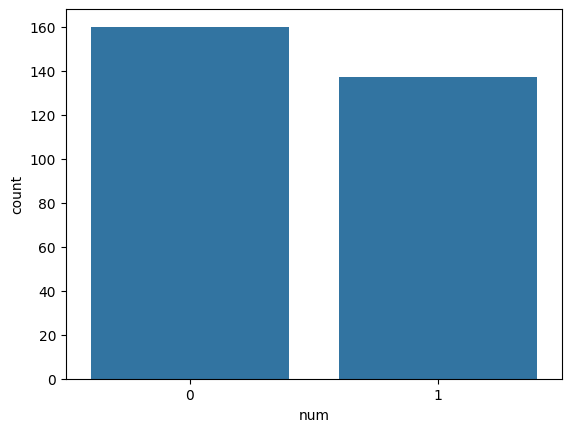

In [20]:
import seaborn as sns
sns.countplot(x='num', data=df)

<Axes: xlabel='age', ylabel='Count'>

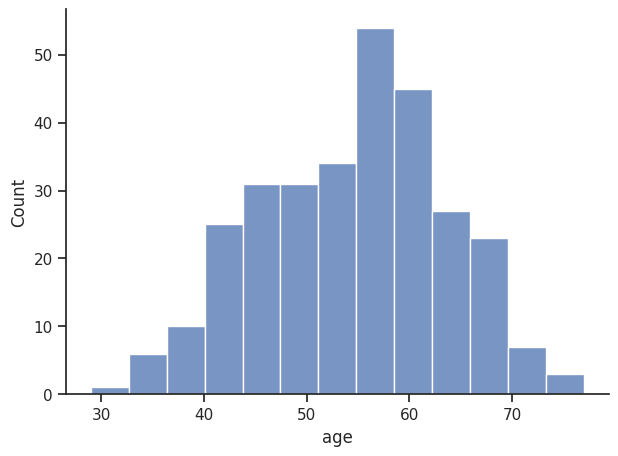

In [21]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="age",
    log_scale=False,
)



<Axes: xlabel='age'>

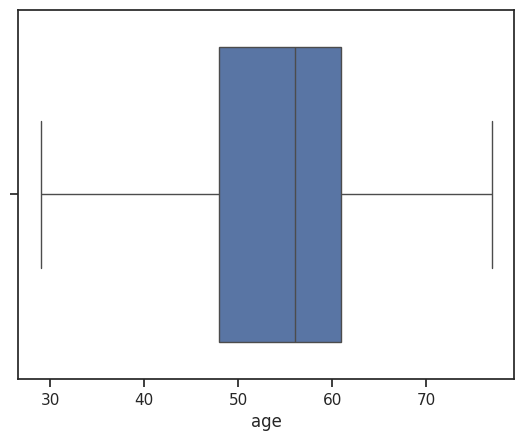

In [22]:
sns.boxplot(x='age', data=df)

<Axes: xlabel='sex', ylabel='count'>

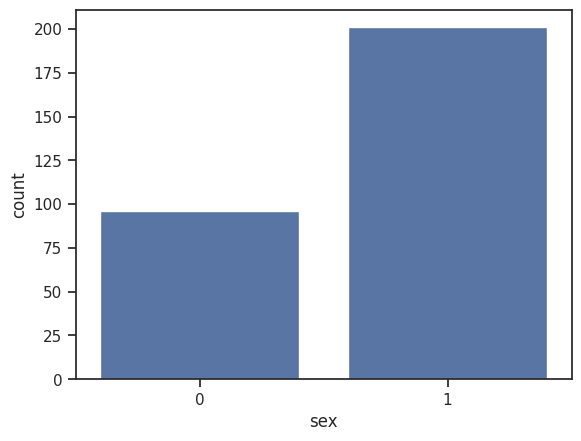

In [23]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='cp', ylabel='count'>

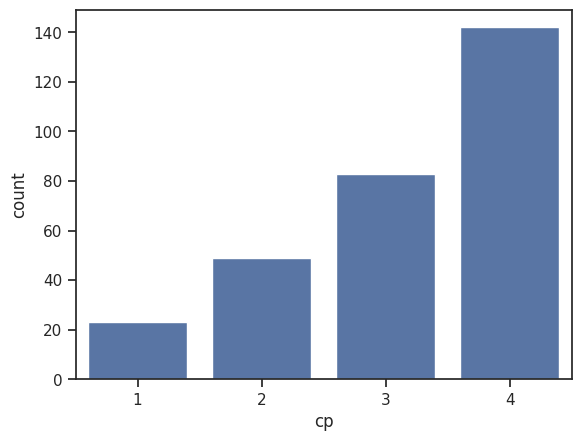

In [24]:
sns.countplot(x='cp', data=df)

<Axes: >

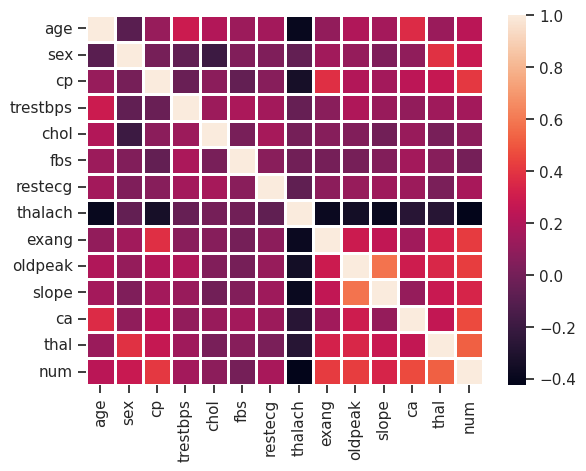

In [25]:
corr = df.corr()
sns.heatmap(corr, annot=False, linewidths=1)

<Axes: xlabel='num', ylabel='age'>

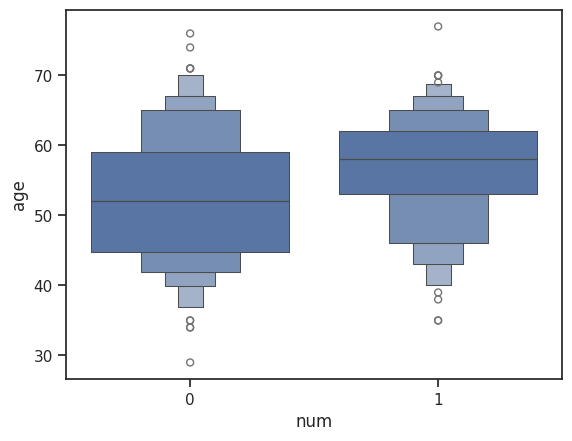

In [26]:
sns.boxenplot(x='num', y='age', data=df)

## modeling

In [27]:
df = df[best_features + ['num']]

In [28]:
list(df.columns)

['thalach', 'thal', 'cp', 'ca', 'age', 'num']

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
thal,297.0,4.730640,1.938629,3.0,3.0,3.0,7.0,7.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
ca,297.0,0.676768,0.938965,0.0,0.0,0.0,1.0,3.0
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
num,297.0,0.461279,0.499340,0.0,0.0,0.0,1.0,1.0


In [30]:
df["thal"][0:10]

,thal
0,6.0
1,3.0
2,7.0
3,3.0
4,3.0
5,3.0
6,3.0
7,3.0
8,7.0
9,7.0


In [31]:
X = df.drop('num', axis=1)
y = df['num']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , stratify=y , random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# pca = PCA(n_components=2)
# X_pca_train = pca.fit_transform(X_train_scaled)
# X_pca_test = pca.transform(X_test_scaled)

In [33]:
X_train.shape

(237, 5)

In [34]:
# X_pca_train.shape

In [35]:
# sns.scatterplot(x=X_pca_train[:,0], y=X_pca_train[:,1], hue=y_train)

In [36]:
X_train.shape

(237, 5)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='sigmoid', C=0.1 , gamma = 'scale')
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Confusion Matrix:
 [[30  2]
 [ 6 22]]


In [38]:
model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
clf = model.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8166666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.84      0.75      0.79        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

Confusion Matrix:
 [[28  4]
 [ 7 21]]


In [39]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

Confusion Matrix:
 [[30  2]
 [ 8 20]]


In [40]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe , X , y , cv=cv, scoring='accuracy')

print("CV scores:", scores)
print("Mean accuracy:", scores.mean())

CV scores: [0.88333333 0.85       0.76271186 0.79661017 0.83050847]
Mean accuracy: 0.824632768361582


In [41]:
# grid = {
#     # 'model__n_estimators': [200,300,400,500],
#     # 'model__max_features': ['sqrt', 'log2'],
#     'model__max_depth' : [3,4,5,6,7,8],
#     # 'model__criterion' :['gini', 'entropy'],
#     'model__random_state' : [12,18,19,20,30,42]
# }

# rf_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv= 5)
# rf_cv.fit(X_train_scaled, y_train)


In [42]:
grid = {
    'model__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [0.1, 1, 10, 100, 1000]
}

svc_cv = GridSearchCV(estimator=pipe, param_grid=grid, cv= 5)
svc_cv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10, 100, 1000],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [43]:
svc_cv.best_params_

{'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'sigmoid'}

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('pca', PCA(n_components=2)),
    ('model', SVC(kernel='sigmoid', C=0.1 , gamma = 'scale'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe,X,y, cv=cv, scoring='accuracy')

print("CV scores:", scores)
print("Mean accuracy:", scores.mean())

CV scores: [0.81666667 0.86666667 0.76271186 0.79661017 0.86440678]
Mean accuracy: 0.8214124293785311


In [45]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='sigmoid', C=0.1 , gamma = 'scale', probability=True))] )
pipe.fit(X_train, y_train)

with open("loan_model2.pkl", "wb") as f:
    pickle.dump(pipe, f)


In [52]:
new_data = {
        'thalach': [160],     # 70-220
        'thal': [6],        # [3,6,7]
        'cp': [2],           # [1,2,3,4]
        'ca': [2],           # [0,1,2,3]
        'age': [40],

}

new_df = pd.DataFrame(new_data)
new_df = new_df[X_train.columns]


with open("loan_model2.pkl", "rb") as f:
    pipe = pickle.load(f)


# Use the loaded pipeline to make predictions
pred_class = pipe.predict(new_df)
pred_proba = pipe.predict_proba(new_df)[:,1]

print("Prediction:", pred_class[0])
print("Probability of Heart Disease:", pred_proba[0])

Prediction: 1
Probability of Heart Disease: 0.523794240220335
